# Chapter 3: Stationary Examples

In this chapter, we are going to go through some stationary data generation examples.  
A. Variance Change (fixed correlation)  
B. Correlation Change (fixed variance)  
C. Change to Different Distribution Part1: Multivariate-Normal to Gaussian-Copula (within the exponential family)  
D. Change to Different Distribution Part2: Multivariate-Normal to Uniform-Random

## A. Variance Change (fixed correlation)
Scenario:  
1. zero correlation among all sensors
2. variance bumps from 1 to 4 at 4,000th sample.

In [1]:
import numpy as np

from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# covariance matrices
cov_var_1 = np.eye(5)
cov_var_4 = 4*np.eye(5)

# multivariate-normal w/ variance 1 for all sensors
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                               distribution="multivariatenormal", mu=np.zeros(5), cov=cov_var_1, to=4000)

# multivariate-normal w/ variance 4 for all sensors
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                               distribution="multivariatenormal", mu=np.zeros(5), cov=cov_var_4, frm=4000)

# data generation
dg.generate(sample_size=sample_size, seed=seed)
dg.plot_data()

<Figure size 2700x450 with 1 Axes>

## B. Correlation Change (fixed variance)
Scenario:  
1. variance for each sensor does not change.
2. zero correlation upto 3,999th sample.
3. high correlation from 4,000th sample.

low correlation covariance matrix:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
high correlation covariance matrix:
 [[ 1.         -0.99257079 -0.9870626  -0.9874708  -0.95661963]
 [-0.99257079  1.          0.97144124  0.98960671  0.97181737]
 [-0.9870626   0.97144124  1.          0.98324535  0.93600408]
 [-0.9874708   0.98960671  0.98324535  1.          0.97347388]
 [-0.95661963  0.97181737  0.93600408  0.97347388  1.        ]]


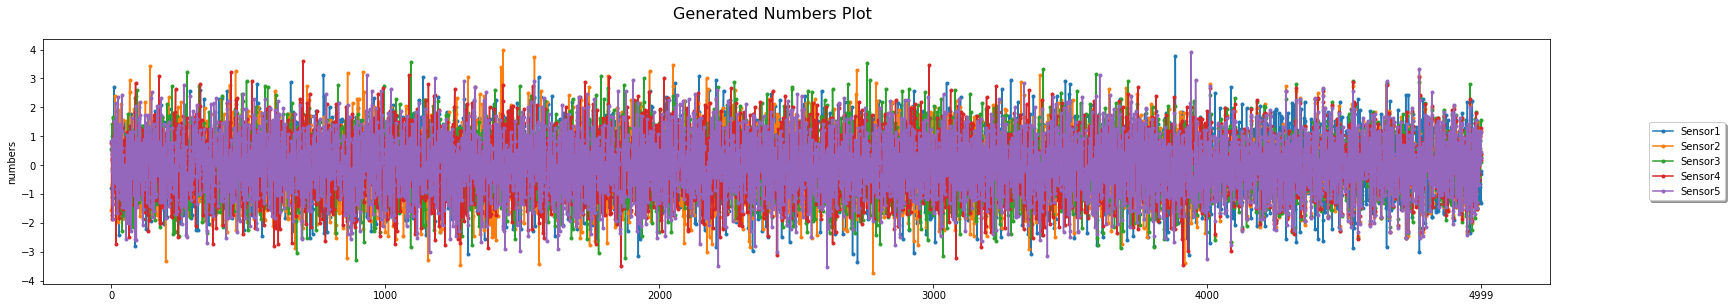

In [2]:
import numpy as np

from scipy.stats import random_correlation
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# covariance matrices
dg.seed(seed)
lo_corr_cov = np.eye(5)
hi_corr_cov = random_correlation.rvs([4.9,0.008,0.07,0.02,0.002])
print("low correlation covariance matrix:\n", lo_corr_cov)
print("high correlation covariance matrix:\n", hi_corr_cov)

# multivariate-normal w/ low correlation covariance matrix
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                               distribution="multivariatenormal", mu=np.zeros(5), cov=lo_corr_cov, to=4000)

# multivariate-normal w/ high correlation covariance matrix
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                               distribution="multivariatenormal", mu=np.zeros(5), cov=hi_corr_cov, frm=4000)

# data generation
dg.generate(sample_size=sample_size, seed=seed)
dg.plot_data()

## C. Change to Different Distribution Part1:  
### Multivariate-Normal to Gaussian-Copula (within the exponential family)

Scenario:  
1. same covariance matrix will be used for both multivariate-normal and gaussian copula.
2. following multivariate-normal upto 3,999th sample.
3. following gaussian-copula from 4,000th sample.

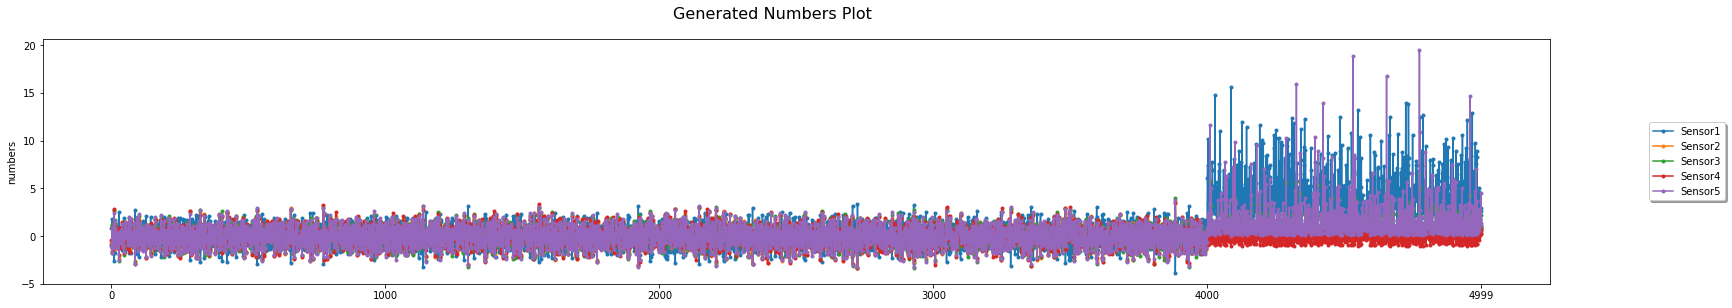

In [3]:
import numpy as np

from scipy.stats import random_correlation
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# covariance matrix
dg.seed(seed)
cov = random_correlation.rvs([4.9,0.07,0.02,0.008,0.002])

# multivariate-normal
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                               distribution="multivariatenormal", mu=np.zeros(5), cov=cov, to=4000)

# gaussian-copula
dg.generation_input.add_option(sensor_names="Sensor1",distribution="gamma", alpha=2.0, beta=0.5)
dg.generation_input.add_option(sensor_names="Sensor2",distribution="beta", alpha=0.5, beta=0.5)
dg.generation_input.add_option(sensor_names="Sensor3",distribution="exponential", lambd=1.0)
dg.generation_input.add_option(sensor_names="Sensor4",distribution="uniform", lo=-1, hi=1)
dg.generation_input.add_option(sensor_names="Sensor5",distribution="lognormal", mu=0, sigma=1)
dg.generation_input.copula(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                           copula_type="gaussian", cov=cov, frm=4000)

# generation
dg.generate(sample_size=sample_size, seed=seed)
dg.plot_data()

## D. Change to Different Distribution Part2:  
### Multivariate-Normal to Uniform-Random

Scenario:  
2. following multivariate-normal upto 3,999th sample.
3. following uniform random from 4,000th sample.

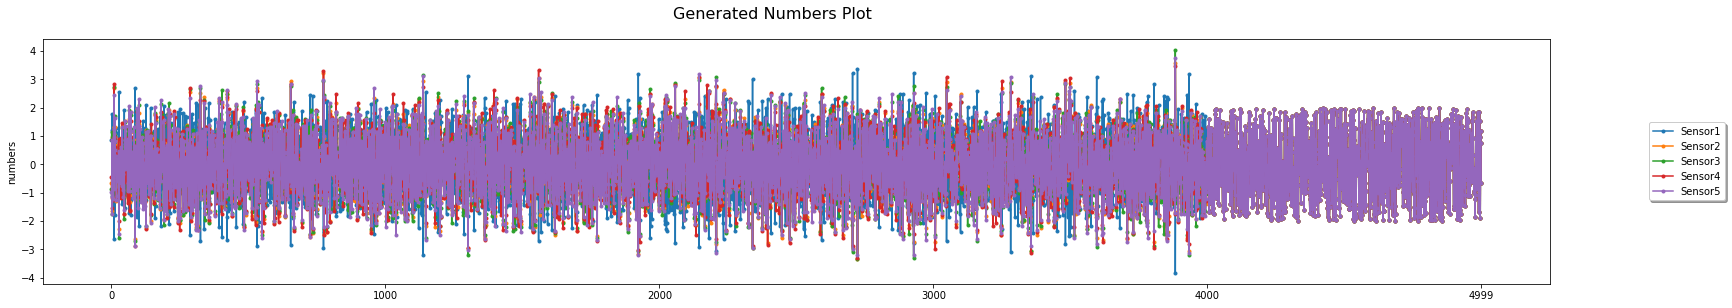

In [4]:
import numpy as np

from math import sin
from scipy.stats import random_correlation
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# covariance matrix
dg.seed(seed)
cov = random_correlation.rvs([4.9,0.07,0.02,0.008,0.002])

# multivariate-normal
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3 Sensor4 Sensor5",
                               distribution="multivariatenormal", mu=np.zeros(5), cov=cov, to=4000)

# uniform-random
for i in range(1, 6):
    dg.generation_input.add_option(sensor_names="Sensor"+str(i),
                               distribution="uniform", lo=-2.0, hi=2.0, frm=4000)

# generation
dg.generate(sample_size=sample_size, seed=seed)
dg.plot_data()